In [1]:
import random # I did it in first instance to create the full_name column
import csv
import pandas as pd

# Load libraries
import seaborn as sns
import matplotlib.pyplot as plt 

In [9]:
# Initialization of the empty dictionary for each column
data_dict = {
    "ages": [],
    "sexes": [],
    "bmis": [],
    "childrens": [],
    "smokers": [],
    "regions": [],
    "charges": []
}

# Open the CSV file using DictReader
with open("insurance.csv", "r") as insurance_file:
    insurance_reader = csv.DictReader(insurance_file)
    
    for row in insurance_reader:
        data_dict["ages"].append(int(row["age"]))
        data_dict["sexes"].append(row["sex"])
        data_dict["bmis"].append(float(row["bmi"]))
        data_dict["childrens"].append(int(row["children"]))
        data_dict["smokers"].append(row["smoker"])
        data_dict["regions"].append(row["region"])
        data_dict["charges"].append(float(row["charges"]))

# Function for calculating the length of any list
def len_of_list(lst):
    return len(lst)

# Function for calculating the average value of a list
def avg_value(lst):
    return sum(lst) / len(lst)

# Printing the average values for each numerical column
avg_ages = round(avg_value(data_dict["ages"]))
print("Average Age:", avg_ages)

avg_bmis = round(avg_value(data_dict["bmis"]), 2)
print("Average BMI:", avg_bmis)

avg_children = round(avg_value(data_dict["childrens"]))
print("Average Number of Children:", avg_children)

avg_charges = round(avg_value(data_dict["charges"]), 2)
print("Average Insurance Charge:", avg_charges)


Average Age: 39
Average BMI: 30.66
Average Number of Children: 1
Average Insurance Charge: 13270.42


In [10]:
# Function to count the occurrences of values in a list
def count_occurrences(lst, value):
    return lst.count(value)

# Counting smokers and non-smokers
total_smokers = count_occurrences(data_dict["smokers"], "yes")
total_non_smokers = count_occurrences(data_dict["smokers"], "no")
print("Total Smokers:", total_smokers)
print("Total Non-Smokers:", total_non_smokers)

# Counting males and females
total_males = count_occurrences(data_dict["sexes"], "male")
total_females = count_occurrences(data_dict["sexes"], "female")
print("Total Males:", total_males)
print("Total Females:", total_females)

Total Smokers: 274
Total Non-Smokers: 1064
Total Males: 676
Total Females: 662


In [11]:
# Function to create a dictionary with the count of each unique value
def create_value_count_dict(lst):
    value_count_dict = {}
    for item in lst:
        if item in value_count_dict:
            value_count_dict[item] += 1
        else:
            value_count_dict[item] = 1
    return value_count_dict

# Creating dictionaries for regions, smokers, and sexes
region_counts = create_value_count_dict(data_dict["regions"])
print("Region Counts:", region_counts)

smoker_counts = create_value_count_dict(data_dict["smokers"])
print("Smoker Counts:", smoker_counts)

sex_counts = create_value_count_dict(data_dict["sexes"])
print("Sex Counts:", sex_counts)

Region Counts: {'southwest': 325, 'southeast': 364, 'northwest': 325, 'northeast': 324}
Smoker Counts: {'yes': 274, 'no': 1064}
Sex Counts: {'female': 662, 'male': 676}


In [12]:
# Function to calculate the difference in average charges between two groups
def calculate_charge_difference(group1, group2, charges):
    total_group1_charges = sum(charges[i] for i, val in enumerate(group1) if val)
    total_group2_charges = sum(charges[i] for i, val in enumerate(group2) if val)
    avg_group1_charge = total_group1_charges / len(group1)
    avg_group2_charge = total_group2_charges / len(group2)
    return round(avg_group1_charge - avg_group2_charge, 2)

# Calculating the difference in average charges between smokers and non-smokers
charge_difference = calculate_charge_difference(data_dict["smokers"], ["no"] * len(data_dict["smokers"]), data_dict["charges"])
print("Average Charge Difference (Smokers - Non-Smokers):", charge_difference)

Average Charge Difference (Smokers - Non-Smokers): 0.0


In [13]:
# Function to calculate the average age of individuals with a specified number of children
def average_age_with_children(children_count, ages, childrens):
    relevant_ages = [ages[i] for i, count in enumerate(childrens) if count == children_count]
    return round(avg_value(relevant_ages))

# Calculating the average age of individuals with one child
average_age_one_child = average_age_with_children(1, data_dict["ages"], data_dict["childrens"])
print("Average Age of Individuals with One Child:", average_age_one_child)

Average Age of Individuals with One Child: 39


In [14]:
# Test on pandas
print("From here everything is with pandas, and the code is UPDATED")

From here everything is with pandas, and the code is UPDATED


In [15]:
df1 = pd.read_csv('insurance.csv')
# df1 = pd.DataFrame(data_dict)
print("Here is our first DataFrame:")
print(df1.head(4))

def average_fn(df_pd, column_name):
    return round(df_pd[column_name].mean())

avg_age_pd = average_fn(df1, "age")
print("This is the average Age, calculed with Pandas: " + str(avg_age_pd))

Here is our first DataFrame:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
This is the average Age, calculed with Pandas: 39


In [16]:
# Lets say we have a list name, with first and last name, not separated if it is male or female.
# The goal is to create a list combination long enough to feed my current data DataFrame so:
first_names = [
    "Adriana", "Alejandro", "Alicia", "Alonso", "Andrés", "Ángel", "Antonio", "Beatriz", 
    "Carlos", "Carmen", "Catalina", "Cecilia", "Cristina", "Daniel", "David", "Diego", 
    "Eduardo", "Elena", "Emilio", "Ernesto", "Fernando", "Francisco", "Gabriel", "Gloria", 
    "Guillermo", "Héctor", "Ignacio", "Isabel", "Javier", "Jesús", "Joaquín", "Jorge", 
    "José", "Juan", "Julia", "Laura", "Luis", "Manuel", "Marcos", "María", "Marta", 
    "Martín", "Miguel", "Natalia", "Nicolás", "Óscar", "Pablo", "Patricia", "Pedro", 
    "Raúl", "Ricardo", "Rosa", "Salvador", "Santiago", "Silvia", "Teresa", "Tomás", 
    "Victoria", "Ximena", "Yolanda", "Zacarías"
]

last_names = [
    "Aguirre", "Alonso", "Álvarez", "Arias", "Benítez", "Blanco", "Cabrera", "Calvo", 
    "Campos", "Cano", "Castillo", "Castro", "Cortés", "Delgado", "Díaz", "Domínguez", 
    "Durán", "Escobar", "Fernández", "García", "Giménez", "Gómez", "González", "Guerrero", 
    "Gutiérrez", "Hernández", "Iglesias", "Jiménez", "López", "Martínez", "Medina", "Mendoza", 
    "Molina", "Moreno", "Muñoz", "Navarro", "Núñez", "Ortega", "Ortiz", "Pérez", "Ramírez", 
    "Ramos", "Reyes", "Rodríguez", "Romero", "Ruiz", "Sánchez", "Santos", "Serrano", "Suárez", 
    "Torres", "Vargas", "Vázquez", "Vega", "Velázquez", "Vicente", "Zamora", "Zapata"
]

# it is enough combinations?
num_combinations = len(df1.age)

assert len(first_names) * len(last_names) >= num_combinations, "There is not enough unique combinations, feed more!"

full_name_list = set()
while len(full_name_list) < num_combinations:
    first_name = random.choice(first_names)
    last_name = random.choice(last_names)
    full_name_list.add(f"{first_name} {last_name}")

full_name_list = list(full_name_list)

get_first_name = lambda str: str.split(' ')[0]
get_last_name = lambda str: str.split(' ')[-1]

# Once we created the full_name_list, we add it to our DataFrame
df1["Full Name"] = full_name_list
# df1["First Name"] = df['Full Name'].apply(get_first_name) # if we want to add the first name in a new column
# df1["Last Name"] = df['Last Name'].apply(get_last_name) # if we want to add the last name in a new column

print("We are updating our first DataFrame with a new column that is the name we added")
print(df1.head(4))

We are updating our first DataFrame with a new column that is the name we added
   age     sex     bmi  children smoker     region      charges     Full Name
0   19  female  27.900         0    yes  southwest  16884.92400  Beatriz Díaz
1   18    male  33.770         1     no  southeast   1725.55230  Jorge Castro
2   28    male  33.000         3     no  southeast   4449.46200   Daniel Ruiz
3   33    male  22.705         0     no  northwest  21984.47061   Pedro Ortiz


In [17]:
# if we want to find how many, or average value of smokers for example, and know the average age of people who smokes or not:
smokers_group_age = df1.groupby("smoker").age.mean().round()
print("This is the table with the average age of the smokers or non smoker group")
print(smokers_group_age)

This is the table with the average age of the smokers or non smoker group
smoker
no     39.0
yes    39.0
Name: age, dtype: float64


In [18]:
# average price of the insurance from smokers an no smokers
smokers_group_charge = df1.groupby("smoker").charges.mean()
print(smokers_group_charge)

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


In [19]:
# average charge of insurance for smokers and the amount of kids
smokers_group_kids_charge = df1.groupby(["smoker", "children"]).charges.mean().reset_index()
print(smokers_group_kids_charge)

   smoker  children       charges
0      no         0   7611.793335
1      no         1   8303.109350
2      no         2   9493.093674
3      no         3   9614.519391
4      no         4  12121.344408
5      no         5   8183.845556
6     yes         0  31341.363954
7     yes         1  31822.654334
8     yes         2  33844.235755
9     yes         3  32724.915268
10    yes         4  26532.276933
11    yes         5  19023.260000


In [20]:
# because we noted that the insured people that smoke and have 5 kids is less than the avg charge we want to know the avg BMI
smokers_children_group_bmi_charges = df1.groupby(["smoker", "children"])[['bmi', 'charges']].mean().round(2).reset_index()
smokers_children_group_bmi_charges_pivoted = smokers_children_group_bmi_charges.pivot(
    columns="smoker",
    index="children",
    values=["bmi", "charges"])
print(smokers_children_group_bmi_charges_pivoted)

            bmi          charges          
smoker       no    yes        no       yes
children                                  
0         30.55  30.54   7611.79  31341.36
1         30.56  30.87   8303.11  31822.65
2         30.88  31.30   9493.09  33844.24
3         30.74  30.52   9614.52  32724.92
4         31.68  29.31  12121.34  26532.28
5         30.27  18.30   8183.85  19023.26


In [21]:
# now we want to do a more complex avg table
general_avg = df1.groupby(["sex", "smoker", "children"])[['age', 'bmi', 'charges']].mean().reset_index()
general_avg["age"] = general_avg["age"].round()
general_avg["bmi"] = general_avg["bmi"].round(2)
general_avg["charges"] = general_avg["charges"].round(2)

general_avg_pivoted = general_avg.pivot(
    columns="smoker",
    index=["sex", "children"],
    values=["age", "bmi", "charges"])

print(general_avg_pivoted)
# print(general_avg)

                  age          bmi          charges          
smoker             no   yes     no    yes        no       yes
sex    children                                              
female 0         39.0  37.0  30.38  30.27   7688.32  30685.06
       1         39.0  40.0  30.21  29.22   8758.56  30264.25
       2         41.0  39.0  30.97  29.24   9921.78  31663.83
       3         43.0  40.0  30.71  29.20  10128.72  30681.60
       4         42.0   NaN  31.94    NaN  13937.67       NaN
       5         37.0  39.0  32.38  18.30   8544.11  19023.26
male   0         39.0  36.0  30.73  30.78   7530.81  31902.40
       1         39.0  39.0  30.93  32.02   7837.15  32904.88
       2         38.0  40.0  30.78  32.68   9020.57  35297.84
       3         41.0  41.0  30.77  31.26   9025.53  33869.17
       4         38.0  30.0  31.41  29.31  10305.01  26532.28
       5         34.0   NaN  28.79    NaN   7931.66       NaN


In [22]:
# pivoted table, to create a easy view of the table with smokers / children / charges

pivoted_general = smokers_group_kids_charge.pivot(
    columns="children",
    index="smoker",
    values="charges").reset_index()

print(pivoted_general)

children smoker             0             1             2             3  \
0            no   7611.793335   8303.109350   9493.093674   9614.519391   
1           yes  31341.363954  31822.654334  33844.235755  32724.915268   

children             4             5  
0         12121.344408   8183.845556  
1         26532.276933  19023.260000  


In [23]:
print('At this instance we want to start seeing some graphics!')

At this instance we want to start seeing some graphics!


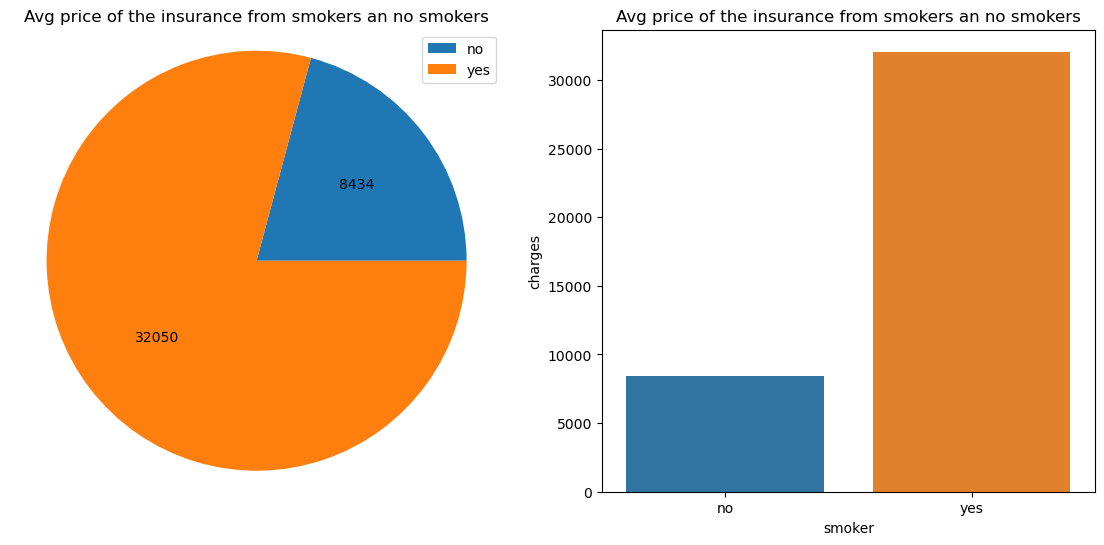

<Figure size 640x480 with 0 Axes>

In [110]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
plt.pie(smokers_group_charge, autopct=lambda p: '{:.0f}'.format(p * sum(smokers_group_charge) / 100))
plt.legend(smokers_group_charge.index)
plt.axis('equal')
plt.title("Avg price of the insurance from smokers an no smokers")


plt.subplot(1,2,2)
dfs = smokers_group_charge.reset_index()
dfs.columns = ["smoker", "charges"]

sns.barplot(x="smoker", y='charges', data=dfs)
plt.title("Avg price of the insurance from smokers an no smokers")

plt.show()
plt.clf()

In [128]:
# We want to see how does my data is related
# So from our DF we will try to find a relation between boths

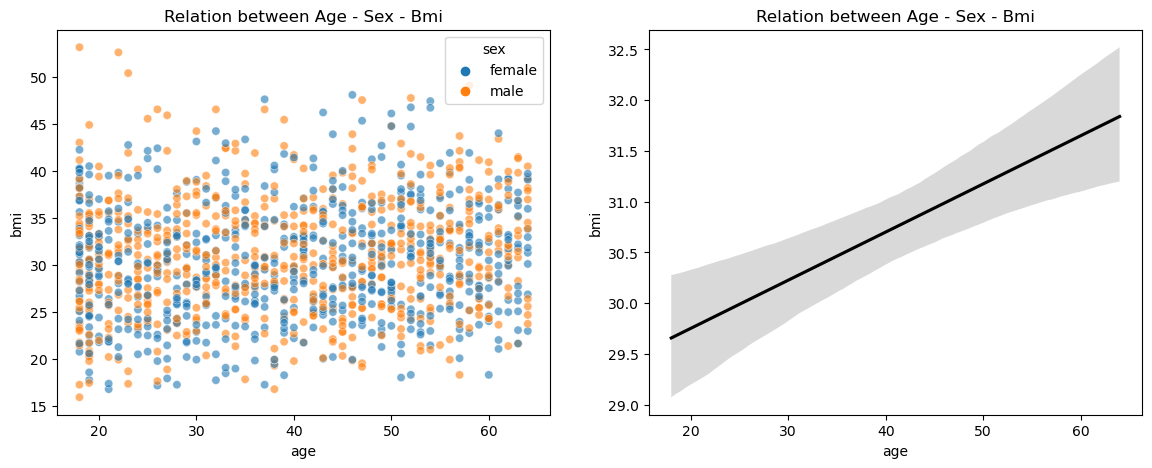

We can see that we have some kind of relation between the age and the bmi


<Figure size 640x480 with 0 Axes>

In [112]:

# print(df1.columns)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='age', y='bmi', hue='sex', data=df1, alpha=0.6)
plt.title("Relation between Age - Sex - Bmi")

plt.subplot(1, 2, 2)
sns.regplot(x='age', y='bmi', data=df1, scatter=False, color='black')
plt.title("Relation between Age - Sex - Bmi")

plt.show()
plt.clf()

print("We can see that we have some kind of relation between the age and the bmi")

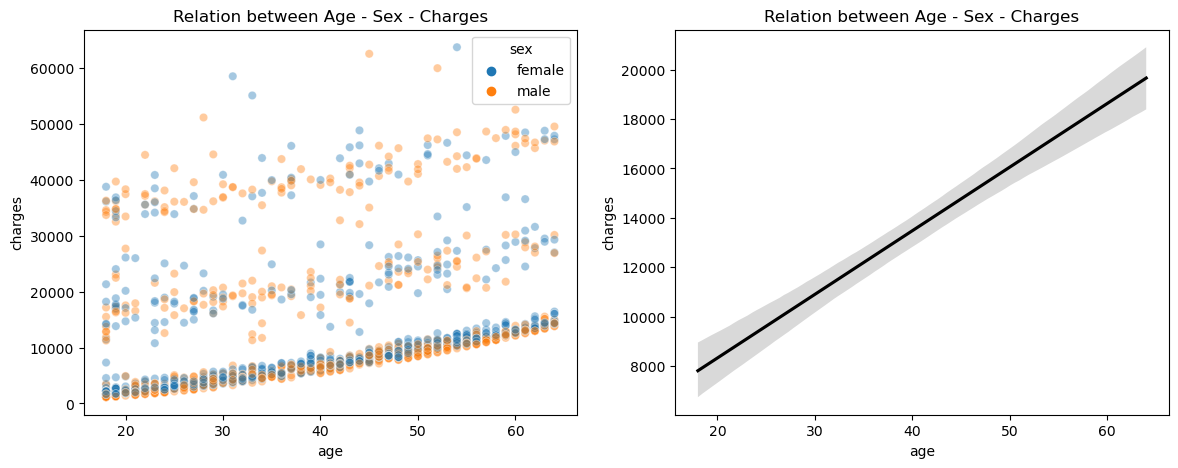

We can see that we have a strong relation between the age and the charges in the insurance


<Figure size 640x480 with 0 Axes>

In [113]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='age', y='charges', hue='sex', data=df1, alpha=0.4)
plt.title("Relation between Age - Sex - Charges")

plt.subplot(1, 2, 2)
sns.regplot(x='age', y='charges', data=df1, scatter=False, color='black')
plt.title("Relation between Age - Sex - Charges")

plt.show()
plt.clf()

print("We can see that we have a strong relation between the age and the charges in the insurance")

We can see that we have a there is no precise relation between the age and the childrens in the insurance


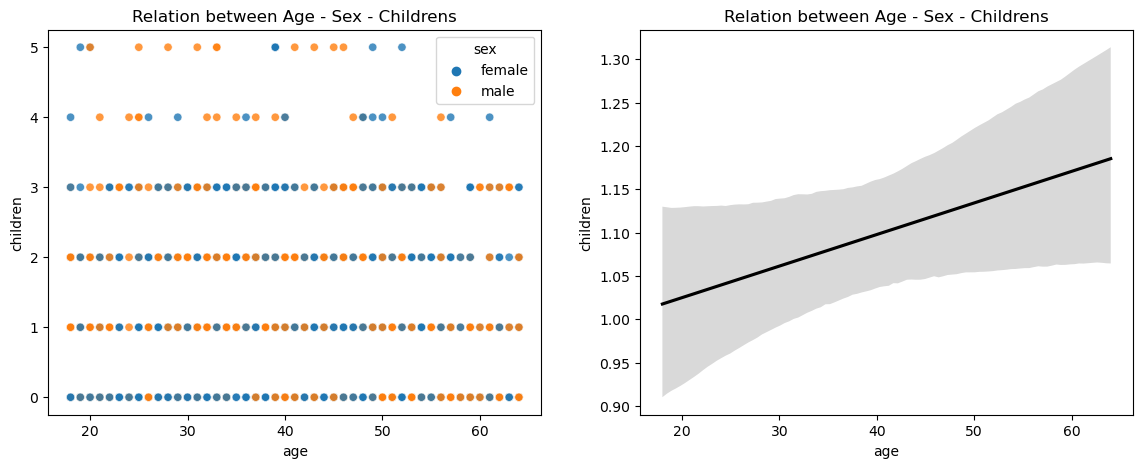

In [114]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='age', y='children', hue='sex', data=df1, alpha=0.8)
plt.title("Relation between Age - Sex - Childrens")

plt.subplot(1, 2, 2)
sns.regplot(x='age', y='children', data=df1, scatter=False, color='black')
plt.title("Relation between Age - Sex - Childrens")

print("We can see that we have a there is no precise relation between the age and the childrens in the insurance")

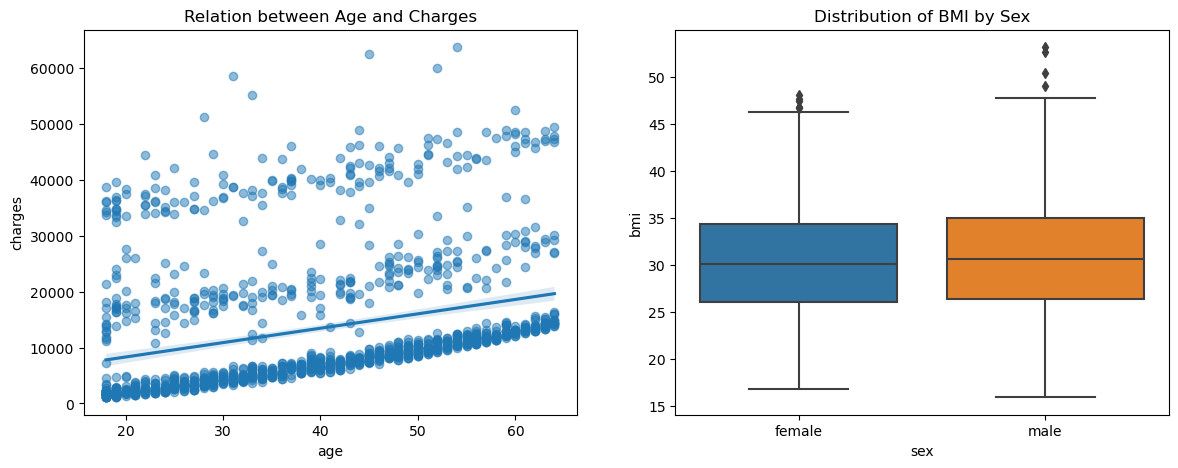

For the graphic Relation between Age and Charges

-trend: we can se a slighty positive correlation between age and charges, that if they are older they will have to pay more
-distribution: we can see a wide range, where some individuals have a really high charge regardelss of the age
-linearity: the regression line indicates a linear relationship, but the spread of datapoints, suggest the age alone is not fully explanation of the charges

Distribution of BMI by Sex
"
-median values: the median BMI for both sexes is around the same range
-iqr: the interquantile range is slighty wider for males than for females, indicating more variability in the BMI of males
-outliers: there are few outliers in both groups that suggest people with really high bmis
-comparison: the distribution of the bmi is a little bit higher for males than females, but the difference is not substancial



<Figure size 640x480 with 0 Axes>

In [123]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.regplot(x='age', y='charges', data=df1, scatter_kws={'alpha':0.5})
plt.title('Relation between Age and Charges')

plt.subplot(1, 2, 2)
sns.boxplot(x='sex', y='bmi', data=df1)
plt.title('Distribution of BMI by Sex')

plt.show()
plt.clf()

print('For the graphic Relation between Age and Charges')
print("""
-trend: we can se a slighty positive correlation between age and charges, that if they are older they will have to pay more
-distribution: we can see a wide range, where some individuals have a really high charge regardelss of the age
-linearity: the regression line indicates a linear relationship, but the spread of datapoints, suggest the age alone is not fully explanation of the charges
""")

print('For the graphic Distribution of BMI by Sex')
print(""""
-median values: the median BMI for both sexes is around the same range
-iqr: the interquantile range is slighty wider for males than for females, indicating more variability in the BMI of males
-outliers: there are few outliers in both groups that suggest people with really high bmis
-comparison: the distribution of the bmi is a little bit higher for males than females, but the difference is not substancial
""")

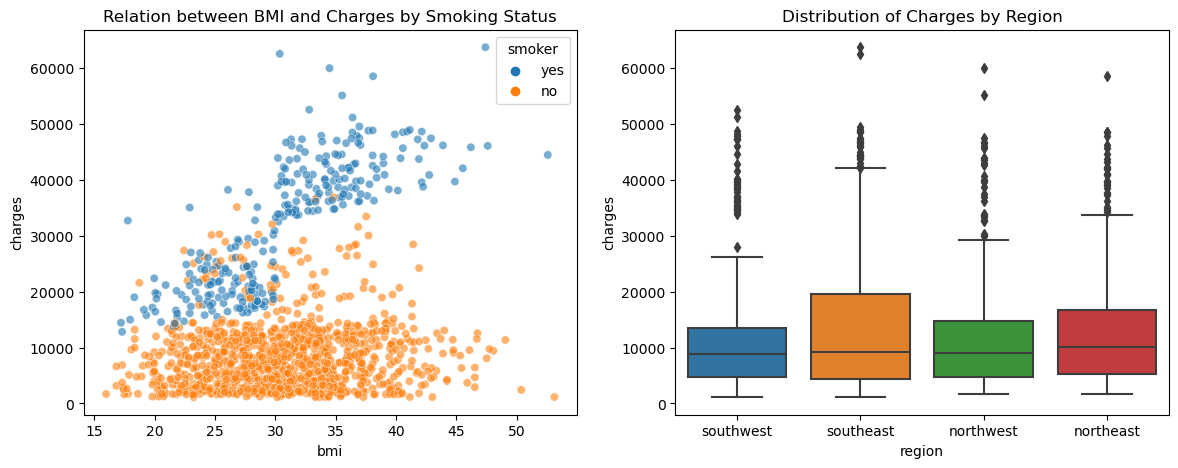

<function matplotlib.pyplot.clf() -> 'None'>

In [118]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df1, alpha=0.6)
plt.title('Relation between BMI and Charges by Smoking Status')

plt.subplot(1, 2, 2)
sns.boxplot(x='region', y='charges', data=df1)
plt.title('Distribution of Charges by Region')

plt.show()
plt.clf()

print('For the graphic Relation between BMI and Charges by Smoking Status')
print("""
-trend: there is a clear difference between smokers and non-smokers, where the charges are much higher in general for smokers
-comparison: 
-- smokers: have higher medical charges than non-smokers across all the BMI levels
-- non-smokers: have a lower charge, and we can se the smokers have a wider spread with some very high charges
-BMI influence:
-- smokers: we can see a small increase in charges while increasing the bmi, but the spread is large
-- non-smokers: the relationship between BMI and charges is less pronunced and more clustered at the lower end of the charges spectrum

""")

print('For the graphic Distribution of Charges by Region')
print("""
-median value: we can see the median varies across regions, where the southeast has the highest median charge
-iqr: the southest show a wider iqr indicating more variability in charges, and other regions have kind of similar variability
outliers: all of the regions have people with high charges
comparison: we can see that the southeast region tend to have higher charges on average

""")

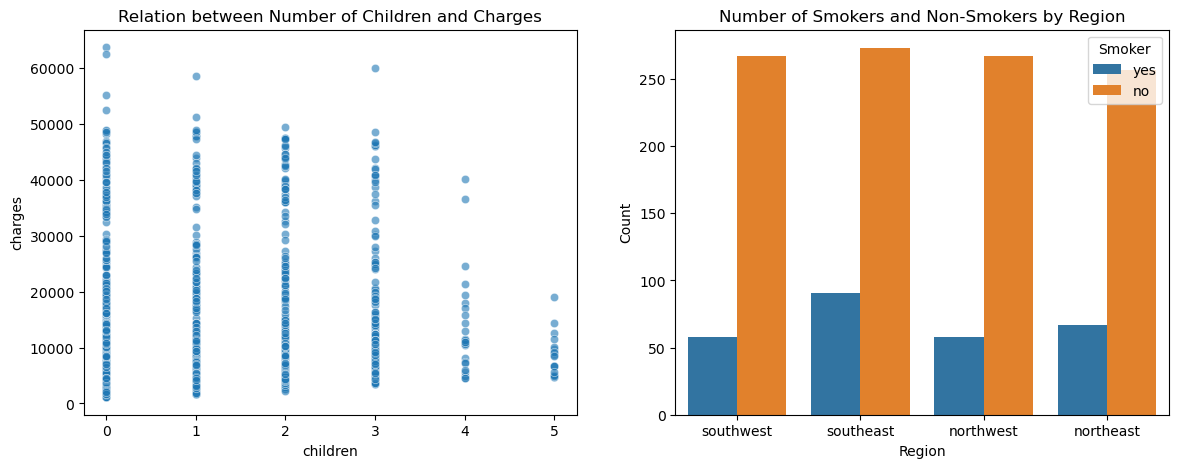

<Figure size 640x480 with 0 Axes>

In [125]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='children', y='charges', data=df1, alpha=0.6)
plt.title('Relation between Number of Children and Charges')

plt.subplot(1, 2, 2)
sns.countplot(x='region', hue='smoker', data=df1)
plt.title('Number of Smokers and Non-Smokers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Smoker', loc='upper right')

plt.show()
plt.clf()

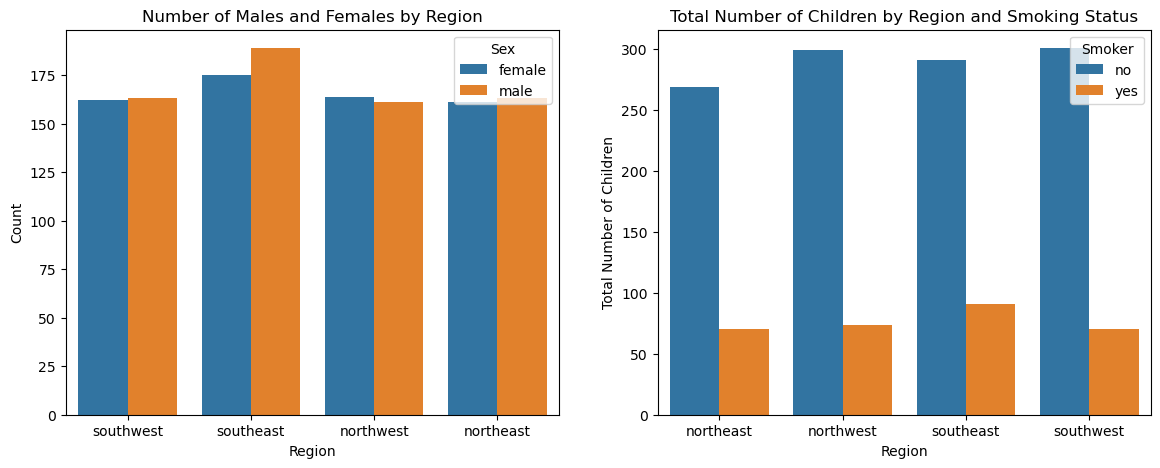

<Figure size 640x480 with 0 Axes>

In [130]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='region', hue='sex', data=df1)
plt.title('Number of Males and Females by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')

plt.subplot(1, 2, 2)
df_children = df1.groupby(['region', 'smoker'])['children'].sum().reset_index()

sns.barplot(x='region', y='children', hue='smoker', data=df_children)
plt.title('Total Number of Children by Region and Smoking Status')
plt.xlabel('Region')
plt.ylabel('Total Number of Children')
plt.legend(title='Smoker', loc='upper right')

plt.show()
plt.clf()